<a href="https://colab.research.google.com/github/JK-Pair/Stock_analysis_project/blob/master/Thai_Stock_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas_datareader

In [151]:
import os, sys
import numpy as np
import pandas as pd
#pd.core.common.is_list_like = pd.api.types.is_list_like

from pandas_datareader import data as pdr
from tqdm import tqdm, trange

import matplotlib.pyplot as plt
import pandas as pd
from IPython.core.display import display, HTML
from datetime import date

display(HTML("<style>.container { width:90% !important; }</style>"))
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

In [166]:
stock_list =  ['KBANK', 'AOT'] # "AOT", "ICHI", "CPALL", "CPF", "ASIMAR", "AAV", "AU", 'SCB', 'BBL', 'KTB', 'AOT', 'PTT'
start_date = "2020-05-19" 
end_date = date.today().strftime("%Y-%m-%d")

In [167]:
data = {}
for quote in tqdm(stock_list):
    try:        
        data[quote] = pdr.get_data_yahoo('{}.BK'.format(quote), start=start_date, end=end_date)        
    except:
        print("Error:", sys.exc_info()[0])
        print("Description:", sys.exc_info()[1]) 
# Cloumns head = High, Low, Open, Close, Volume, Adj Close

100%|██████████| 2/2 [00:00<00:00,  3.67it/s]


In [168]:
print("Show all stocks in the list", list(data.keys()))
[df.head(10) for key, df in data.items()]

Show all stocks in the list ['KBANK', 'AOT']


[             High    Low   Open  Close    Volume  Adj Close
 Date                                                       
 2020-05-19  87.75  84.00  84.25  87.00  26622000      87.00
 2020-05-20  88.50  87.00  88.00  88.00  16666600      88.00
 2020-05-21  88.50  86.75  88.50  87.25  12975400      87.25
 2020-05-22  86.75  84.75  86.75  85.50  12036200      85.50
 2020-05-25  87.50  86.00  86.00  87.00   5999300      87.00
 2020-05-26  89.25  87.50  87.75  88.25  13289000      88.25
 2020-05-27  91.75  89.25  89.25  90.50  26095900      90.50
 2020-05-28  96.25  94.25  94.25  96.00  38821500      96.00
 2020-05-29  96.00  94.00  95.00  96.00  21773100      96.00
 2020-06-01  99.50  96.75  97.00  97.75  20529200      97.75,
              High    Low   Open  Close    Volume  Adj Close
 Date                                                       
 2020-05-19  60.75  59.75  60.50  60.00  29824400      60.00
 2020-05-20  60.25  59.00  60.00  59.50  17100500      59.50
 2020-05-21  59.50  58.

[Text(0.5, 1.0, 'KBANK'), Text(0.5, 1.0, 'AOT')]

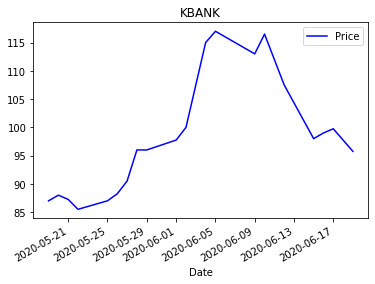

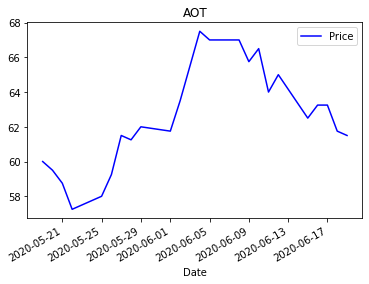

In [169]:
[ df.plot(y='Adj Close', label='Price', style='-b').set_title(key)  for key, df in data.items()]

In [170]:
!pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

  Using cached https://github.com/matplotlib/mpl_finance/archive/master.zip
  Created wheel for mpl-finance: filename=mpl_finance-0.10.1-cp36-none-any.whl size=8423 sha256=9d70760a850186149ffda526a956610e16fbb27b38a79bb6d9bfe40942d01330
  Stored in directory: /tmp/pip-ephem-wheel-cache-h_rl6iwy/wheels/8f/bf/8a/6c858b2a3be945c7b2d658fbf6ab797b451d686cbee8aa2679
Successfully built mpl-finance


In [171]:
import matplotlib.ticker as mticker
from mpl_finance import candlestick_ohlc
from urllib.request import urlopen
import matplotlib.dates as mdates

In [172]:
# [df.columns.values for key, df in data.items()]
# [df.iloc[:]["Close"].values for key, df in data.items()] #numpy.array()

In [173]:
def graph_data(stock, dataDict):

    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))
    

    timestamp   = dataDict["timestamp"]
    date        = dataDict["date"]
    closep      = dataDict["closep"]
    highp       = dataDict["highp"]
    lowp        = dataDict["lowp"]
    openp       = dataDict["openp"]
    volume      = dataDict["volume"]
    adj_closep  = dataDict["adj_closep"]


    x = 0
    y = len(date)
    ohlc = []

    while x < y:
        append_me = date[x], openp[x], highp[x], lowp[x], closep[x], volume[x]
        ohlc.append(append_me)
        x+=1


    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')

    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(80)

    ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax1.xaxis.set_major_locator(mticker.MaxNLocator(10))
    ax1.grid(True)

    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(stock)
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()

No handles with labels found to put in legend.


Key:  KBANK


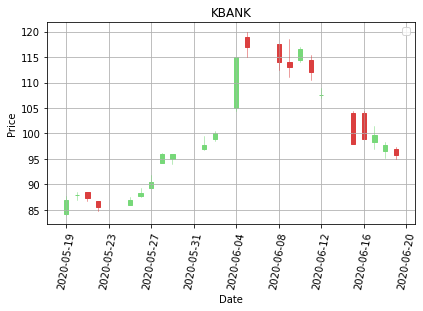

No handles with labels found to put in legend.


Key:  AOT


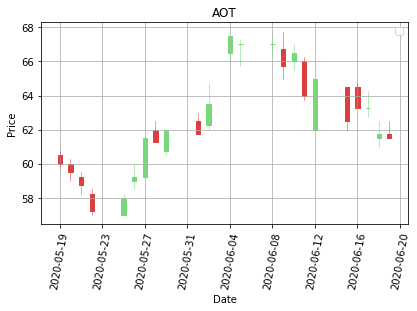

In [174]:
for key, df in data.items():
    StoreData = dict()
    StoreData["timestamp"]   = df.index.tolist()
    StoreData["date"]        = [timestamp[item].toordinal() for item in range(len(timestamp))]
    StoreData["closep"]      = df.iloc[:]["Close"].values.tolist()
    StoreData["highp"]       = df.iloc[:]["High"].values.tolist()
    StoreData["lowp"]        = df.iloc[:]["Low"].values.tolist()
    StoreData["openp"]       = df.iloc[:]["Open"].values.tolist()
    StoreData["volume"]      = df.iloc[:]["Volume"].values.tolist()
    StoreData["adj_closep"]  = df.iloc[:]["Adj Close"].values.tolist()
    print("Key: ", key)
    graph_data(key, StoreData)

